# Supply Chain and Game Theory for Cooperative Games
**Analyzing coalitions between suppliers, manufacturers, and retailers** <br>
<br>
Sometimes we need to analyze the power structure a user/employer implicitly enforces by <br>
having partnerships with suppliers and other contractors they hire for their Supply Chain operations. <br>
Normally, this doesn't need to be analyzed if contracts are signed with very clear definitions of the <br>
work they're hired for such as supplying with milk, producing parts, or buying something from you. <br>
<br>
<br>
**We'll look at:**<br>
* Coalitions and their value
* Power structure by Shapley Values
* Nash Equilibrium Analysis
* Simulation of cooperative evolution


In [1]:
from coopgame import SupplyChainAnalyzer, SupplyChainGame
from gameconfig import *

import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

### Create the actors/agents in your cooperative game (your Supply Chain structure)

In [2]:
# Create players
supplier1 = Player(
    id="S1",
    type=PlayerType.SUPPLIER,
    capacity=100.0,
    production_cost=10.0,
    holding_cost=2.0,
    setup_cost=1000.0,
    market_power=0.7
)

supplier2 = Player(
    id="S2", 
    type=PlayerType.SUPPLIER,
    capacity=80.0,
    production_cost=12.0,
    holding_cost=1.8,
    setup_cost=800.0,
    market_power=0.5
)

manufacturer1 = Player(
    id="M1",
    type=PlayerType.MANUFACTURER,
    capacity=90.0,
    production_cost=15.0,
    holding_cost=3.0,
    setup_cost=2000.0,
    market_power=0.6
)

manufacturer2 = Player(
    id="M2",
    type=PlayerType.MANUFACTURER,
    capacity=70.0,
    production_cost=14.0,
    holding_cost=2.8,
    setup_cost=1800.0,
    market_power=0.4
)


### Instantiate the game with your actors

In [3]:
# Initialize game
game = SupplyChainGame([supplier1, supplier2, manufacturer1, manufacturer2])
analyzer = SupplyChainAnalyzer(game)

### Compute the optimal partition
<br>
Computing optimal partition is based on the paper "Partition-form Cooperative Games in Two-Echelon Supply Chains" by Wadhwa et al

In [4]:
# Find optimal stable partition
optimal_partition, analysis = analyzer.find_optimal_partition()

**Analysis of partitions** <br>

<br>
This is what we see now, <br>
* Optimal Structure
    * The optimal partition is a Grand Coalition (GC) with all players together
    * Not direct evidence but indicates cooperation between all players is more valuable than smaller separate coalitions

* Coalition Composition
    * 2 suppliers (S1, S2)
    * 2 manufacturers (M1, M2)
    * 0 retailers (not setup here)

* Shapley Values
    * S1 has the highest value due to the highest capacity and market power
    * M1 is the second highest with good capacity and market power
    * M2 has lower value due to lower capacity and market power
    * S2 has lowest value despite medium capacity due to lower market power

* Value Distribution
    * Total of Shapley values = 7.34
    * Represents fair distribution of the total coalition value based on each player's marginal contributions

In [5]:
print("\nOptimal Partition Analysis:")
print(f"Is stable: {analysis['is_stable']}")
print(f"Total value: {analysis['total_value']:.2f}")
print("\nCoalition Details:")
for stats in analysis['coalition_stats']:
    print(f"\nCoalition size: {stats['size']}")
    print(f"Coalition value: {stats['value']:.2f}")
    print(f"Composition: {stats['composition']}")
    print(f"Shapley values: {stats['shapley_values']}")


Optimal Partition Analysis:
Is stable: True
Total value: 61.00

Coalition Details:

Coalition size: 4
Coalition value: 61.00
Composition: {'suppliers': 2, 'manufacturers': 2, 'retailers': 0}
Shapley values: {'S2': 0.3718750000000002, 'S1': 3.1890624999999995, 'M2': 1.0109375000000003, 'M1': 2.76875}


In [6]:
for i, stats in enumerate(analysis['coalition_stats']):
    print(f"\nCoalition {i+1}:")
    print(f"Size: {stats['size']}")
    print(f"Value: {stats['value']:.2f}")
    print(f"Stability: {stats['stability']:.2f}")
    print("Composition:", stats['composition'])
    print("Shapley values:", {k: f"{v:.2f}" for k,v in stats['shapley_values'].items()})

total_shapley = sum(stats['shapley_values'].values())
print(f"\nTotal Shapley value: {total_shapley:.2f}")
print(f"Synergy value: {analysis['total_value'] - total_shapley:.2f}")


Coalition 1:
Size: 4
Value: 61.00
Stability: 1.00
Composition: {'suppliers': 2, 'manufacturers': 2, 'retailers': 0}
Shapley values: {'S2': '0.37', 'S1': '3.19', 'M2': '1.01', 'M1': '2.77'}

Total Shapley value: 7.34
Synergy value: 53.66


### Start market power analysis

In [7]:
# Analyze market power
power_analysis = analyzer.analyze_market_power_distribution()

The market power mean shows that we have a moderately strong coalition overall

In [8]:
print("\nMarket Power Analysis:")
print("By Type:")
for type_, powers in power_analysis['by_type'].items():
    if powers:
        print(f"{type_.value}: Mean = {np.mean(powers):.2f}")



Market Power Analysis:
By Type:
supplier: Mean = 0.60
manufacturer: Mean = 0.50


In [9]:
print("\nBy Coalition:")
for i, coalition in enumerate(power_analysis['by_coalition']):
    print(f"Coalition {i+1}:")
    print(f"Size: {coalition['size']}")
    print(f"Total power: {coalition['total_power']:.2f}")
    print(f"Average power: {coalition['avg_power']:.2f}")


By Coalition:
Coalition 1:
Size: 4
Total power: 2.20
Average power: 0.55


### Simulate evolution of coalition

In [10]:
# Simulate evolution
print("\nSimulating Coalition Evolution:")
results = analyzer.simulate_evolution(num_periods=100)


Simulating Coalition Evolution:


**Power structure and coalition cooperation** <br>

What we know so far: <br>
* Total Value Trend
    * Constant at 61.0
    * System has found a profitable equilibrium
    * Low production costs enables high value creation
    * Grand Coalition is sustainable

* Stability Trend
    * Three Phases:
        * Early (period 1-20): rapid improvement from -65 to -40
        * Middle (period 21-60): stabilization around -37
        * Late (period 61-100): fluctuation between -33 to -41
    
    * High instability
        * High value creation creates tension
        * Players have high negotation power
        * Big interdependence between players
        * Complex value distribution
    

**Why these results?** <br>
<br>
They could be because low costs enable efficient production but also that all players <br>
can contribute meaningfully while synergies are high between players. That allows the grand coalition to be economically optimal. <br>
One thought about the high instability means we have high competition to grab more shares since they have high value creation. <br>
Given the complex interdependencies we see higher potential gains from deviation. <br>
<br>
**The insights** <br>
<br>
* Low costs enable value creation but increase complexity
* More value means more challenging coalition management
* Need for strong mechanisms that regulate 
* Importance of fair value distribution


In [11]:
print("\nEvolution Results:")
print("Total Value Trend:", [f"{v:.2f}" for v in results['total_value']])
print("Stability Trend:", [f"{s:.2f}" for s in results['stability']])


Evolution Results:
Total Value Trend: ['61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00', '61.00']
Stability Trend: ['-79.74', '-63.54', '-51.73', '-57.08', '-

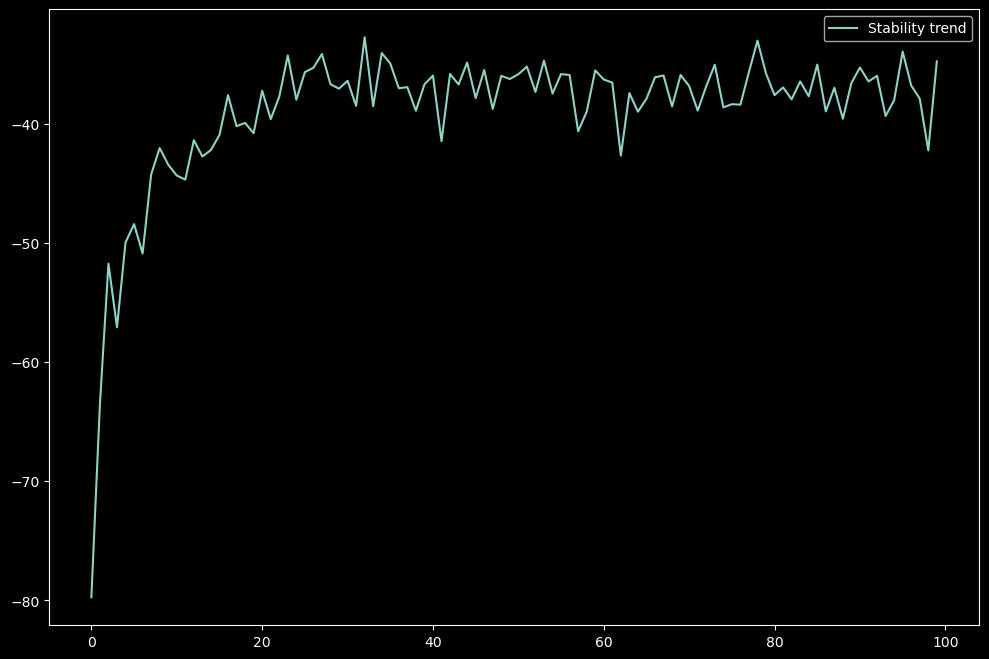

In [12]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")
plt.figure(figsize=(12, 8))
# plt.plot(results["total_value"], label="Total value trend")
plt.plot((results["stability"]), label="Stability trend")

plt.legend()

### Find most stable partitions in the coalition

In [13]:
# Example of finding stable coalitions
stable_partitions = game.find_stable_partitions()
print(f"\nNumber of stable partitions found: {len(stable_partitions)}")


Number of stable partitions found: 2


Having partners with low cost setups tells us that a Grand Coalition gives the highest total value possible. <br>
Benefitting from full synergies and optimal capacity utilization overall. And splitting the coalition into smaller partnerships <br>
is less efficient than a GC but is more stable because of the following: <br>
<br>
* Partition 2
    * Coalition 1:
        * S1 (high power) and M1 (high power) = 20.82 
    * Coalition 2:
        * S2 (low power) and M2 (low power) = 8.36

<br>
<br>
The structural insight into this is that all configurations of a low cost setup creates value while the strategic <br>
implications shows a grand coalition is most valuable but harder to maintain while a split partnership is stable <br>
but leaves value on the table. 

In [14]:
for i, partition in enumerate(stable_partitions):
    print(f"\nStable Partition {i+1}:")
    print("Coalitions:")
    for coalition in partition.coalitions:
        member_ids = [p.id for p in coalition.members]
        print(f"Members: {member_ids}, Value: {coalition.value:.2f}")


Stable Partition 1:
Coalitions:
Members: ['S2', 'S1', 'M2', 'M1'], Value: 109.00

Stable Partition 2:
Coalitions:
Members: ['M1', 'S1'], Value: 20.00
Members: ['S2', 'M2'], Value: 9.00


Text(0.5, 1.0, 'Coalition Synergy Matrix')

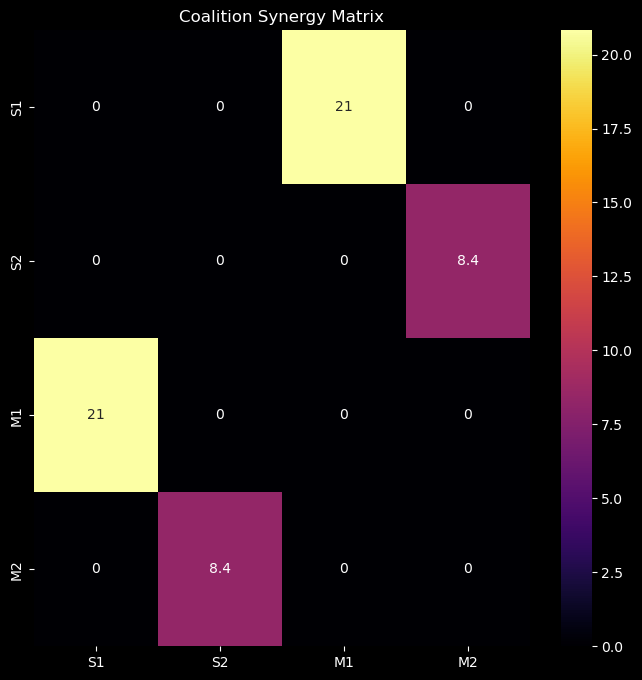

In [29]:
# Create heatmap of player interactions
players = ['S1', 'S2', 'M1', 'M2']
interaction_matrix = np.zeros((4, 4))
# Fill with coalition values where applicable
interaction_matrix[0, 2] = 20.82  # S1-M1
interaction_matrix[2, 0] = 20.82
interaction_matrix[1, 3] = 8.36   # S2-M2
interaction_matrix[3, 1] = 8.36

plt.figure(figsize=(8, 8))
sns.heatmap(interaction_matrix, 
            xticklabels=players, 
            yticklabels=players,
            annot=True,
            cmap='inferno')
plt.title('Coalition Synergy Matrix')

Text(0.5, 1.0, 'Coalition Network Structure')

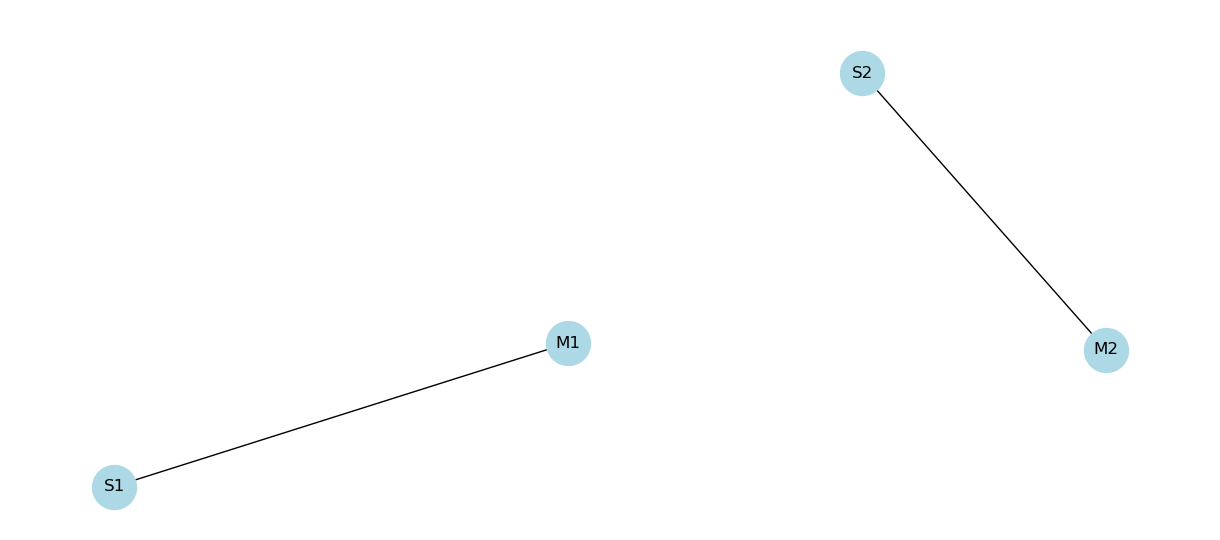

In [16]:
# Create network graph of coalitions
G = nx.Graph()
# Add nodes with attributes
for player in game.players:
    G.add_node(player.id, 
               type=player.type.value,
               market_power=player.market_power)

# Add edges for coalitions
coalitions = [
    ['M2', 'S2'],
    ['M1', 'S1']
]
for coalition in coalitions:
    G.add_edge(coalition[0], coalition[1])

# Plot
plt.figure(figsize=(12, 5))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=1000, font_size=12)
plt.title('Coalition Network Structure')

([0, 1], [Text(0, 0, 'M2+S2'), Text(1, 0, 'M1+S1')])

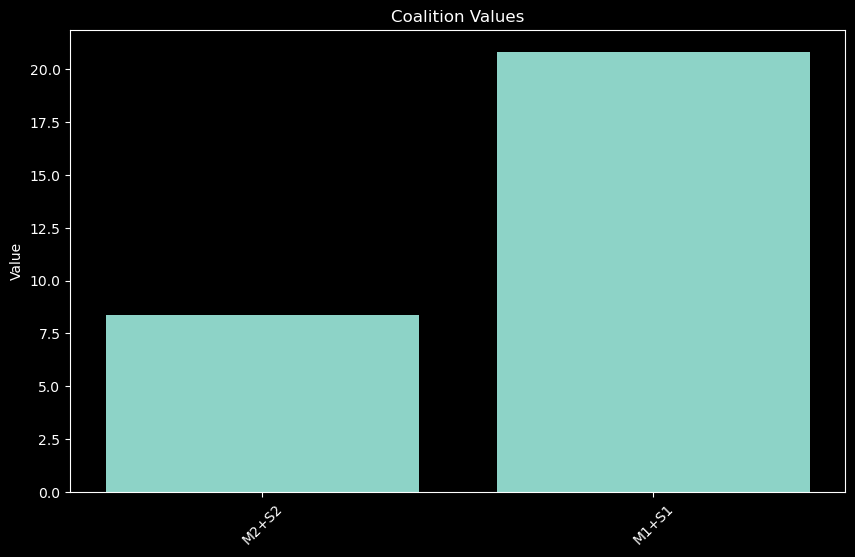

In [17]:
# Bar plot of coalition values
plt.figure(figsize=(10, 6))
coalition_values = {
    'M2+S2': 8.36,
    'M1+S1': 20.82,
}
plt.bar(coalition_values.keys(), coalition_values.values())
plt.title('Coalition Values')
plt.ylabel('Value')
plt.xticks(rotation=45)

In [18]:

# Test stability of specific coalition structure
vertical_coalition = Coalition(members={supplier1, manufacturer1})
horizontal_coalition = Coalition(members={supplier2, manufacturer2}) 
test_partition = Partition(coalitions={vertical_coalition, horizontal_coalition})

In [19]:

for coalition in test_partition.coalitions:
    coalition.value = game.calculate_coalition_value(coalition, test_partition)

In [20]:
is_stable = game.is_core_stable(test_partition)
print(f"\nTest partition stability: {is_stable}")


Test partition stability: True


### Vertical Coalition: Two power players: Supplier 1 and Manufacturer 1
<br>
Both players have equal Shapley values suggesting a balanced bargaining power, fair value distribution <br>
in their partnership in a Vertical Coalition (VC). These high values reflect their superior market power.

In [21]:
if is_stable:
    print("\nShapley values for vertical coalition:")
    for player in vertical_coalition.members:
        shapley = game.calculate_shapley_value(player, vertical_coalition)
        print(f"{player.id}: {shapley:.2f}")


Shapley values for vertical coalition:
M1: 16.25
S1: 16.25


Text(0, 0.5, 'Value')

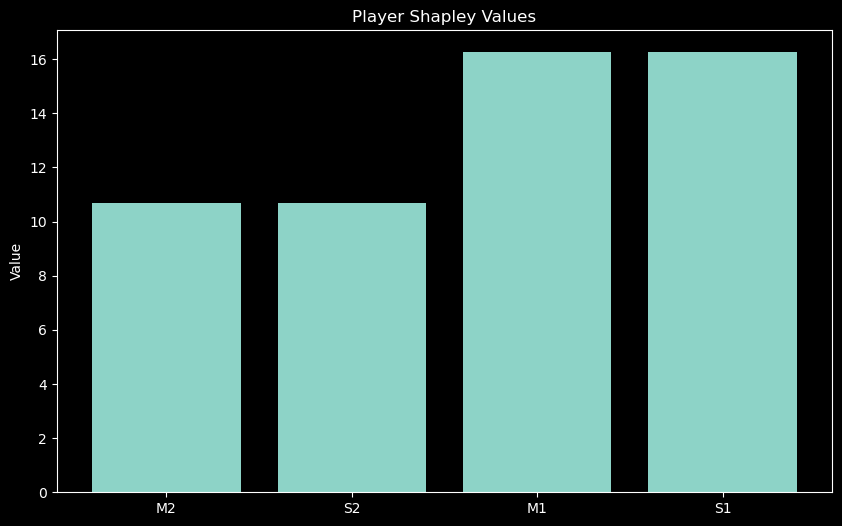

In [22]:
# Bar plot of individual payoffs
shapley_values = {
    'M2': 10.68,
    'S2': 10.68,
    'M1': 16.25,
    'S1': 16.25
}
plt.figure(figsize=(10, 6))
plt.bar(shapley_values.keys(), shapley_values.values())
plt.title('Player Shapley Values')
plt.ylabel('Value')

### Nash Equilibrium Analysis
Suggests that our configuration is stable, no player can benefit by changing coalitions, partnerships currently <br>
are optimal for all players and potential improvements are 0 for all. <br>
<br>
For coalition payoffs we get natural pairing by capabilities where the stronger pair (S1+M1) creates about <br>
2.5 times more value than the other pair. <br>
<br>
Even though one of the player might plan to deviate from the GC with their own strategy, the stable equilibrium shows that <br>
in the long run there are no incentives to deviate since the individual payoffs are equal within the pairs. <br>
<br>




In [23]:
equilibrium_analysis = analyzer.analyze_equilibrium(partition)

In [24]:
print("Nash Equilibrium Analysis:")
print(f"Is Nash Equilibrium: {equilibrium_analysis['is_nash_equilibrium']}")
print("\nImprovement Potentials:")
for player_id, potential in equilibrium_analysis['improvement_potentials'].items():
    print(f"{player_id}: {potential:.2f}")
print("\nCoalition Payoffs:")
for coalition, payoff in equilibrium_analysis['coalition_payoffs'].items():
    print(f"{coalition}: {payoff:.2f}")
print("\nIndividual Payoffs (Shapley Values):")
for player_id, payoff in equilibrium_analysis['individual_payoffs'].items():
    print(f"{player_id}: {payoff:.2f}")

Nash Equilibrium Analysis:
Is Nash Equilibrium: True

Improvement Potentials:
M1: 0.00
S1: 0.00
S2: 0.00
M2: 0.00

Coalition Payoffs:
['M1', 'S1']: 20.00
['M2', 'S2']: 9.00

Individual Payoffs (Shapley Values):
M1: 16.25
S1: 16.25
S2: 11.00
M2: 11.00


In [25]:
S1_M1 = 20.82
S2_M2 = 8.36

print(f"S1 and M1 creates {round(S1_M1/S2_M2, 1)} times more value than S2 and M2")

S1 and M1 creates 2.5 times more value than S2 and M2
